In [1]:
import pandas as pd
import seaborn as sb

In [3]:
df = pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\weather_data.csv')

In [4]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [5]:
df.set_index('day',inplace=True)

In [6]:
df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/9/2017,NaN,NaN,NaN
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


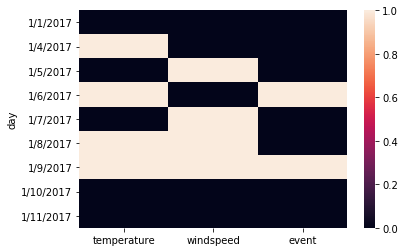

In [7]:
sb.heatmap(df.isnull())

## FInding Null values

In [8]:
new_df = df.fillna(0)

In [9]:
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,0.0,9.0,Sunny
1/5/2017,28.0,0.0,Snow
1/6/2017,0.0,7.0,0
1/7/2017,32.0,0.0,Rain
1/8/2017,0.0,0.0,Sunny
1/9/2017,0.0,0.0,0
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [10]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed':0,
        'event':  'no event'
})

In [11]:
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,0.0,9.0,Sunny
1/5/2017,28.0,0.0,Snow
1/6/2017,0.0,7.0,no event
1/7/2017,32.0,0.0,Rain
1/8/2017,0.0,0.0,Sunny
1/9/2017,0.0,0.0,no event
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [12]:
#Forward fill
new_df = df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,32.0,9.0,Sunny
1/5/2017,28.0,9.0,Snow
1/6/2017,28.0,7.0,Snow
1/7/2017,32.0,7.0,Rain
1/8/2017,32.0,7.0,Sunny
1/9/2017,32.0,7.0,Sunny
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [14]:
#Backward fill
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,28.0,9.0,Sunny
1/5/2017,28.0,7.0,Snow
1/6/2017,32.0,7.0,Rain
1/7/2017,32.0,8.0,Rain
1/8/2017,34.0,8.0,Sunny
1/9/2017,34.0,8.0,Cloudy
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


## Linear Interpolation

In [15]:
#Linear Interpolation
#linear interpolation is a method of curve fitting using linear interpolation
#to construct new data points
#within the range of a discrete set of known data points.
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.000000,6.00,Rain
1/4/2017,30.000000,9.00,Sunny
1/5/2017,28.000000,8.00,Snow
1/6/2017,30.000000,7.00,NaN
1/7/2017,32.000000,7.25,Rain
1/8/2017,32.666667,7.50,Sunny
1/9/2017,33.333333,7.75,NaN
1/10/2017,34.000000,8.00,Cloudy
1/11/2017,40.000000,12.00,Sunny


In [16]:
# Using dropna to remove the rows
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [17]:
#Drop rows having all null values
new_df = df.dropna(how="all")
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [18]:
#Need two valid values in order to keep the row
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/7/2017,32.0,NaN,Rain
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


## Dropping Rows by index label

In [21]:
new_data = df.drop('1/4/2017',axis=0)

In [22]:
new_data

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/9/2017,NaN,NaN,NaN
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


## Dropping Columns by index label

In [23]:
new_data = df.drop(["windspeed"],axis=1)

In [24]:
new_data

,temperature,event
day,,
1/1/2017,32.0,Rain
1/4/2017,NaN,Sunny
1/5/2017,28.0,Snow
1/6/2017,NaN,NaN
1/7/2017,32.0,Rain
1/8/2017,NaN,Sunny
1/9/2017,NaN,NaN
1/10/2017,34.0,Cloudy
1/11/2017,40.0,Sunny


In [27]:
# Dropping multiple columns
new_data = df.drop(["windspeed",'event'],axis=1)

In [28]:
new_data

,temperature
day,
1/1/2017,32.0
1/4/2017,NaN
1/5/2017,28.0
1/6/2017,NaN
1/7/2017,32.0
1/8/2017,NaN
1/9/2017,NaN
1/10/2017,34.0
1/11/2017,40.0


In [29]:
df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/9/2017,NaN,NaN,NaN
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [30]:
df.drop(["windspeed"],axis=1,inplace=True)

In [31]:
df

,temperature,event
day,,
1/1/2017,32.0,Rain
1/4/2017,NaN,Sunny
1/5/2017,28.0,Snow
1/6/2017,NaN,NaN
1/7/2017,32.0,Rain
1/8/2017,NaN,Sunny
1/9/2017,NaN,NaN
1/10/2017,34.0,Cloudy
1/11/2017,40.0,Sunny
